<a href="https://colab.research.google.com/github/shreyash0502/MLmodels/blob/main/Task1_supervised_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1><b>This is my project for prediction using Supervised Machine Learning.</h1>

```
#Here, I will implement the Linear Regression ML algorithm for my model.
```


---









First, we import all the necessary libraries for developing the Linear Regression model.

---
```
# Here, we will use the sci-kit learn python library.
# We will also use python libraries- pandas(for data formatting and manipulation) and numpy(for array manipulation).
# Finally, I will use matplotlib library for visualization. 
```






In [ ]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
from sklearn import metrics


Now, we will import the data from the link and store it in a variable. 


---



In [ ]:
data = pd.read_csv("http://bit.ly/w-data")
data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


I will now manipulate the data variable and store the features and labels in separate variables "X" & "y".


---



In [ ]:
#X = data.iloc[:, :-1].values  
#y = data.iloc[:, 1].values
X = data[["Hours"]].values
y = data[["Scores"]].values
#y = y.T
#y = y.reshape((-1,))
#print(X.shape, y.shape)
#print(X, y)

Visualization of data is an important aspect. With visualization, we can understand better and develop human insights like developing trends and patterns in data. 

Now, we will visualize the data.

---



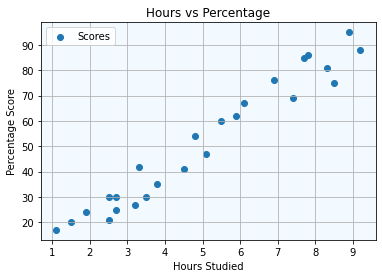

In [ ]:
l_reg = linear_model.LinearRegression()
ax = plt.axes()
ax.set_facecolor("#f3faff")
plt.grid()
plt.scatter(X, y)
plt.legend(["Scores"])
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')
plt.show()

Now, we have successfully imported the data and visualized it. We can now train our Linear Regression model as shown below. 


---



Training complete!


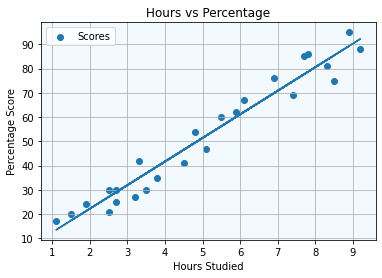

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
model = l_reg.fit(X_train, y_train)
print("Training complete!")
m = l_reg.coef_
b = l_reg.intercept_
line = m*X + b
ax = plt.axes()
ax.set_facecolor("#f3faff")
plt.grid()
plt.scatter(X, y)
plt.legend(["Scores"])
plt.title('Hours vs Percentage') 
plt.plot(X, line) 
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')
plt.show()

We can verify our model has trained correctly by comparing its result on the test-set with the actual values. 


---



In [ ]:
y_pred = model.predict(X_test)
#print(y_test.shape, y_pred.shape)
y_pred = y_pred.reshape((-1,))
y_test = y_test.reshape((-1,))
#print(y_test.shape, y_pred.shape)
#y_pred.reshape(1, -1)
#print(y_pred)
#print(y_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df

,Actual,Predicted
0,47,53.075278
1,27,34.448887
2,69,75.623015
3,76,70.721333
4,81,84.446042


Now that we have trained the model and cross-checked it on test-set, We can make predictions using our own data and get the output. 


---



Enter hours of study: 9.25
Prediction = 93.7592378391897


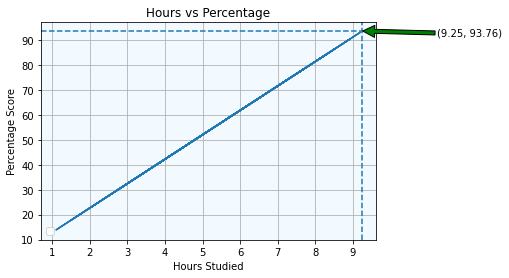

In [ ]:
#on custom data
hours = input("Enter hours of study: ")
#hours = 9.25
hours = np.array(hours, dtype='float64')
prediction = model.predict(hours.reshape(1, -1))
print("Prediction = {}".format(prediction[0][0]))
#plt.figure(facecolor = "blue")
ax = plt.axes()
plt.legend(["Scores"])
plt.title('Hours vs Percentage') 
plt.plot(X, line) 
plt.axvline(x = hours, linestyle = "dashed")
ax.set_facecolor("#f3faff")
#plt.annotate("Input Hours", (hours, 10))
plt.annotate(s = "("+str(hours)+", "+str("{:.2f}".format(prediction[0][0]))+")", xy = (hours, prediction[0][0]), xytext =(hours+2, prediction[0][0]-2), arrowprops = dict(facecolor ='green', shrink = 0.005))
plt.axhline(y = prediction[0][0], linestyle = "dashed")
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')
plt.grid()
plt.show()

We can evaluate the performance of the model based on some metrics which are shown below. 


---



In [ ]:
print("R^2 Score: ", model.score(X_test, y_test))
print("Metric Error Score: ", metrics.mean_absolute_error(y_test, y_pred))

R^2 Score:  0.9135565898631521
Metric Error Score:  5.774377891709396
